In [41]:
import os
import numpy as np
from matplotlib import ticker, dates as mdates, pyplot as plt
from pysar.utils import readfile, writefile, ptime, plot as pp

work_dir = '/Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/PIXELWISE_GEOMETRY'
os.chdir(work_dir)
print('go to directory: '+work_dir)

inc_angle_file = './../INPUTS/geometryRadar.h5'
inc_angle, atr = readfile.read(inc_angle_file, datasetName='incidenceAngle')

vel_trop_diff_file = 'velocityEcmwf_diffInc.h5'
vel_trop_diff = readfile.read(vel_trop_diff_file)[0]

# Read point timeseries
labels = ['W', 'F', 'SN']  #Wolf, Fernandina, Sierra Negra
xs = [1200, 1310, 410] 
ys = [690, 1370, 1910]
ts_files = []
for x, y in zip(xs, ys):
    cmd = 'tsview_legacy.py ECMWF_diffInc.h5 --yx {} {} --nodisplay'.format(y, x)
    print(cmd)
    os.system(cmd)
    ts_files.append('y{}_x{}_ts.txt'.format(y, x))
print('Done.')

go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/PIXELWISE_GEOMETRY
reading incidenceAngle data from file: ./../INPUTS/geometryRadar.h5 ...
tsview_legacy.py ECMWF_diffInc.h5 --yx 690 1200 --nodisplay
tsview_legacy.py ECMWF_diffInc.h5 --yx 1370 1310 --nodisplay
tsview_legacy.py ECMWF_diffInc.h5 --yx 1910 410 --nodisplay
Done.


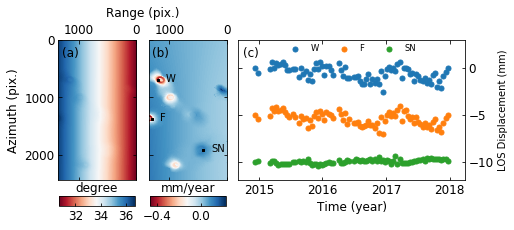

In [78]:
from matplotlib.ticker import MultipleLocator
font_size = 12
marker_size = 5

fig = plt.figure(figsize=[7, 3])
ax1  = fig.add_axes([0.08,  0.19, 0.20, 0.65])   # [x0, y0, width, height]
ax2  = fig.add_axes([0.26,  0.19, 0.20, 0.65])
ax3  = fig.add_axes([0.46,  0.19, 0.45, 0.65])
cax1 = fig.add_axes([0.105, 0.07, 0.15, 0.05])
cax2 = fig.add_axes([0.285, 0.07, 0.15, 0.05])

# axes 1/2
num_row, num_col = inc_angle.shape
im1 = ax1.imshow(inc_angle, cmap='RdBu')
im2 = ax2.imshow(vel_trop_diff*1000., cmap='RdBu')
ax2.set_xlim(-0.5, num_col-0.5)
ax2.set_ylim(num_row-0.5, -0.5)
for ax in [ax1, ax2]:
    ax.invert_xaxis()
    ax.set_yticks(np.arange(0,2500,1000))
    ax.xaxis.tick_top()
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax2.set_yticklabels([])
ax1.set_ylabel('Azimuth (pix.)', fontsize=font_size)
pp.set_shared_xlabel([ax1, ax2], label='Range (pix.)', labelpad=0.13, position='top', font_size=font_size)
ax1.xaxis.set_label_position("top")

ax2.scatter(xs, ys, marker='s', s=2, c='k')
for label, x, y in zip(labels, xs, ys):
    ax2.annotate(label, xy=(x, y), xytext=(8, -2), textcoords='offset points')

# colorbars
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('degree', fontsize=font_size)
cbar1.locator = ticker.MaxNLocator(nbins=3)
cbar1.update_ticks()

cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('mm/year', fontsize=font_size)
cbar2.locator = ticker.MaxNLocator(nbins=2)
cbar2.update_ticks()

for cbar in [cbar1, cbar2]:  cbar.ax.xaxis.set_label_position('top')
for cax  in [cax1,  cax2 ]:  cax.tick_params(direction='in', labelsize=font_size)

# axes 3
offsets = [0, -5, -10]
date_list = list(np.loadtxt(ts_files[0], dtype=bytes).astype(str)[:, 0])
dates = ptime.date_list2vector(date_list)[0]
for ts_file, offset, label in zip(ts_files, offsets, labels):
    ts = np.loadtxt(ts_file, dtype=bytes).astype(str)[:, 1].astype(np.float)
    ax3.scatter(dates, ts*1000.+offset, s=marker_size**2, label=label)
ax3.set_ylim([-12, 3])
ax3.set_ylabel('LOS Displacement (mm)')
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_xlabel('Time (year)', fontsize=font_size)
ax3.xaxis.set_major_locator(mdates.YearLocator(1))
ax3.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax3.legend(loc='upper center', frameon=False, borderaxespad=0.1, fontsize=font_size*0.7, ncol=3)

ax1.annotate('(a)', xy=(0.05, 0.88), color='k', xycoords='axes fraction', fontsize=font_size)
ax2.annotate('(b)', xy=(0.05, 0.88), color='k', xycoords='axes fraction', fontsize=font_size)
ax3.annotate('(c)', xy=(0.02, 0.88), color='k', xycoords='axes fraction', fontsize=font_size)

plt.savefig('pixel_inc4trop.jpg', dpi=600)
plt.show()